## *Exploratory Data Analysis*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_gd = pd.read_csv('glassdoor_cleaned.csv')

In [3]:
def title_simplifier(title):
    temp_title = title.lower()
    if 'data scientist' in temp_title:
        return 'data scientist'
    elif 'data engineer' in temp_title:
        return 'data engineer'
    elif 'analyst' in temp_title:
        return 'analyst'
    elif 'machine learning' in temp_title:
        return 'mle'
    elif 'manager' in temp_title:
        return 'manager'
    elif 'director' in temp_title:
        return 'director'
    else:
        return 'na'

def title_simplifier(title):
    switcher={
                'data scientist':'data scientist',
                'data engineer':'data engineer',
                'analyst':'analyst',
                'machine learning':'machine learning',
                'manager':'manager',
                'director':'director',
             }
    return switcher.get(title.lower(),'na')

def seniority(title):
    temp_title = title.lower()
    list_sr = ['sr','senior','lead','principal']
    list_jr = ['jr','jr.']
    
    if list_sr in temp_title:
        return 'senior'
    elif list_jr in temp_title:
        return 'junior'
    else:
        return 'na'

In [4]:
def seniority(title):
    temp_title = title.lower()
    if 'sr' in temp_title or 'senior' in temp_title or 'sr' in temp_title or 'lead' in temp_title or 'principal' in temp_title:
            return 'senior'
    elif 'jr' in temp_title or 'jr.' in temp_title:
        return 'jr'
    else:
        return 'na'

In [5]:
df_gd['job_simplified'] = df_gd['Job Title'].apply(title_simplifier)

In [6]:
df_gd.job_simplified.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simplified, dtype: int64

In [7]:
df_gd['seniority'] = df_gd['Job Title'].apply(seniority)

In [8]:
df_gd.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [9]:
df_gd['desc_len'] = df_gd['Job Description'].apply(lambda x: len(x))

In [10]:
df_gd.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp prov', 'min_sal', 'max_sal', 'avg_sal', 'company_txt',
       'state', 'hq_loc', 'age_comp', 'python_ys', 'excel_ys', 'tableau_ys',
       'job_simplified', 'seniority', 'desc_len'],
      dtype='object')

*Fixing LA as state error*

In [11]:
df_gd['state'] = df_gd.state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

*Counting the number of compertitors*

In [12]:
df_gd['num_competitors'] = df_gd.Competitors.apply(lambda x: len(x.split(',')) if x != '-1' else 0)

*Converting hourly income to annual*

In [13]:
df_gd['min_sal'] = df_gd.apply(lambda x: x.min_sal * 2 if x.hourly == 1 else x.min_sal, axis = 1)
df_gd['max_sal'] = df_gd.apply(lambda x: x.max_sal * 2 if x.hourly == 1 else x.max_sal, axis = 1)

*Removing \n from company text column*

In [14]:
df_gd['company_txt'] = df_gd.company_txt.apply(lambda x: x.replace('\n',''))

### EDA start

In [15]:
df_gd.describe()

,Rating,Founded,hourly,emp prov,min_sal,max_sal,avg_sal,hq_loc,age_comp,python_ys,excel_ys,tableau_ys,desc_len,num_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.522911,0.199461,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.499812,0.399865,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,1.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [16]:
df_gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  emp prov           742 non-null    int64  
 16  min_sal            742 non

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd54350880>,
      dtype=object)

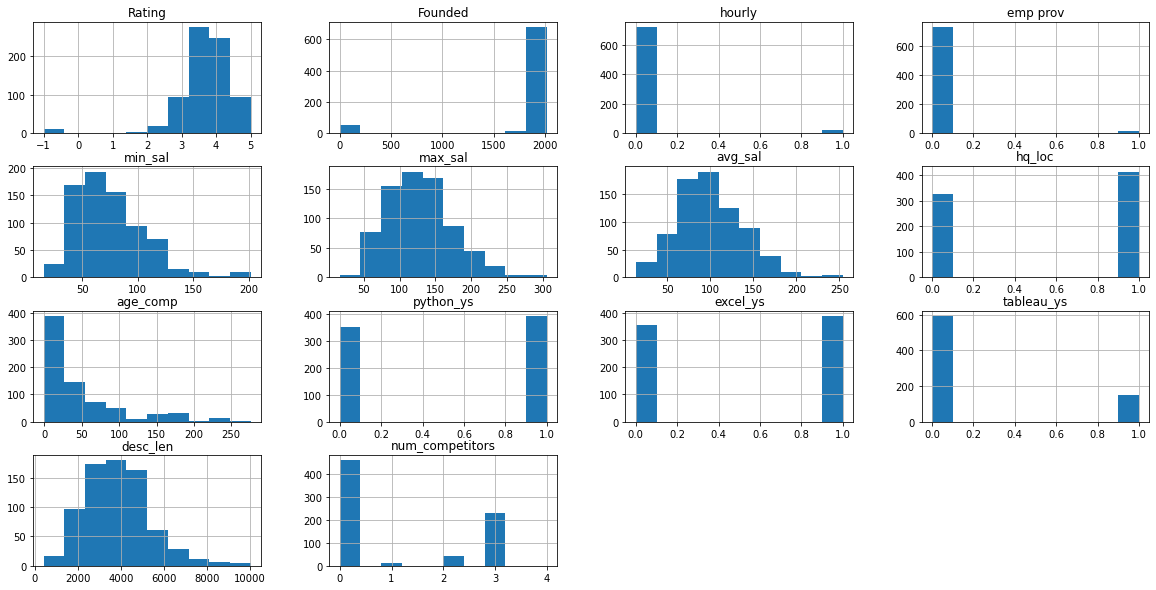

In [17]:
df_gd.hist(figsize=(20,10))

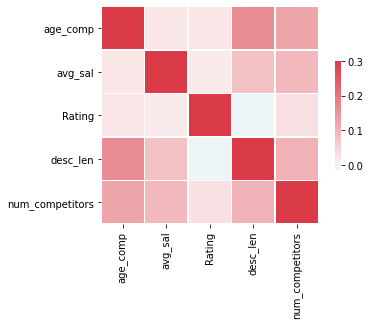

In [22]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_gd[['age_comp','avg_sal','Rating','desc_len','num_competitors']].corr(), cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink':.5})

In [21]:
df_gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  emp prov           742 non-null    int64  
 16  min_sal            742 non

In [40]:
df_gd_cat = df_gd[['Size', 'Type of ownership', 'Sector', 'Revenue', 'hq_loc',
      'python_ys','excel_ys','tableau_ys','job_simplified','seniority']]

Graph for Size total = 9


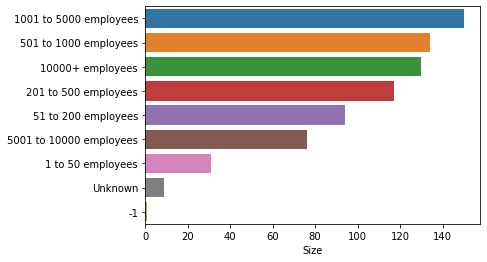

Graph for Type of ownership total = 11


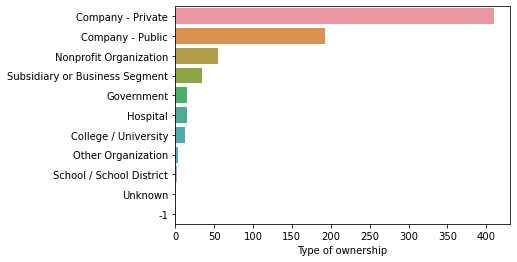

Graph for Sector total = 25


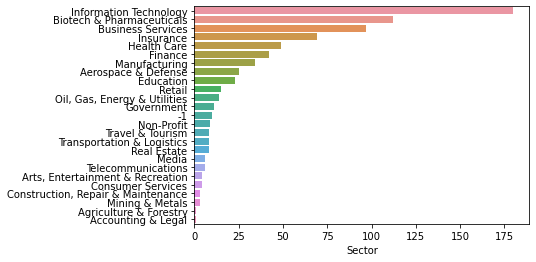

Graph for Revenue total = 14


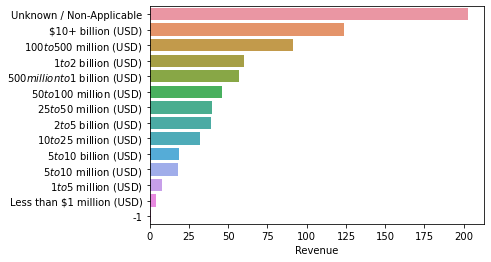

Graph for hq_loc total = 2


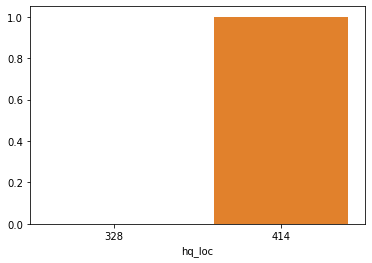

Graph for python_ys total = 2


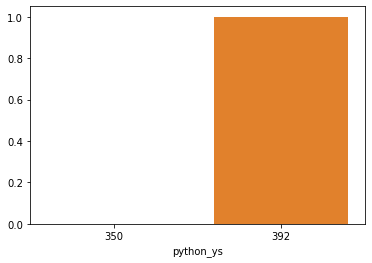

Graph for excel_ys total = 2


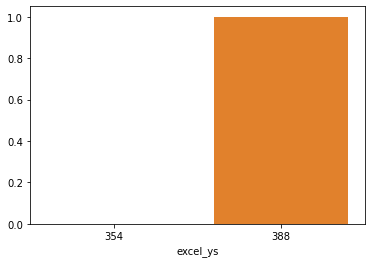

Graph for tableau_ys total = 2


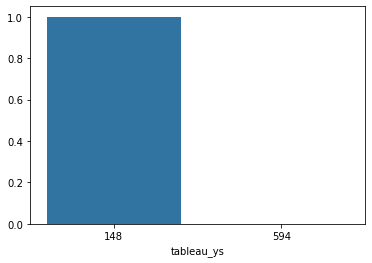

Graph for job_simplified total = 7


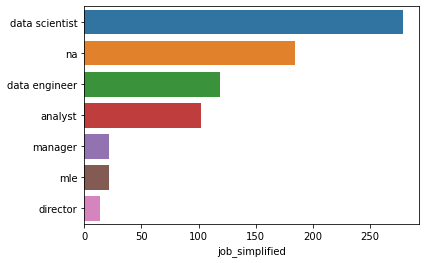

Graph for seniority total = 3


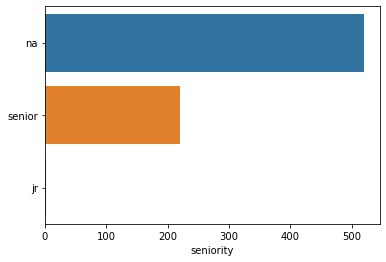

In [41]:
for i in df_gd_cat.columns:
    cat_num = df_gd_cat[i].value_counts()
    print(f'Graph for {i} total = {len(cat_num)}')
    sns.barplot(y = cat_num.index, x=cat_num)
    plt.show()

Graph for Location total = 20


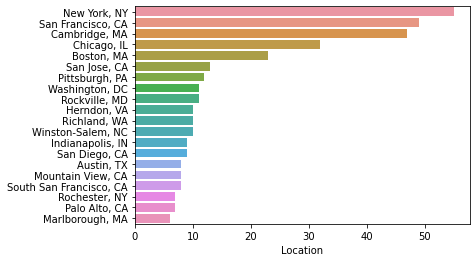

Graph for Headquarters total = 20


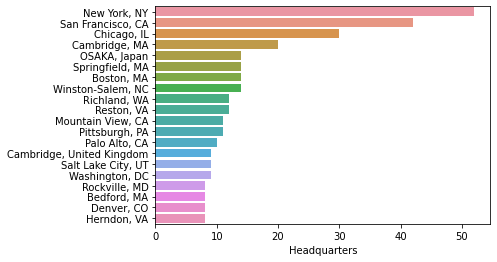

Graph for company_txt total = 20


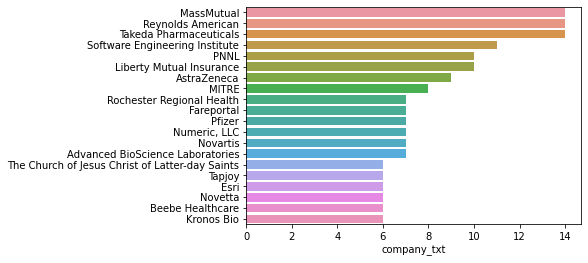

Graph for Industry total = 20


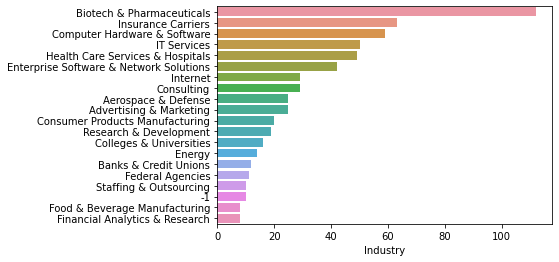

In [38]:
for i in df_gd[['Location','Headquarters','company_txt','Industry']].columns:
    cat_num = df_gd[i].value_counts()[:20]
    print(f'Graph for {i} total = {len(cat_num)}')
    sns.barplot(y = cat_num.index, x=cat_num)
    plt.show()

In [42]:
df_gd.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp prov', 'min_sal', 'max_sal', 'avg_sal', 'company_txt',
       'state', 'hq_loc', 'age_comp', 'python_ys', 'excel_ys', 'tableau_ys',
       'job_simplified', 'seniority', 'desc_len', 'num_competitors'],
      dtype='object')

In [44]:
pd.pivot_table(df_gd, index= ['job_simplified','seniority'], values = 'avg_sal')

avg_sal
job_simplified seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [49]:
pd.set_option('display.max_rows', None)

In [51]:
pd.pivot_table(df_gd, index= ['state','job_simplified'], values = 'avg_sal', aggfunc='count').sort_values('state', ascending=False)

avg_sal
state job_simplified         
WI    na                    4
      data scientist        3
      analyst               3
WA    na                    1
      data scientist       17
      analyst               3
VA    na                    5
      mle                   2
      data scientist       18
      data engineer        10
      analyst               6
UT    data engineer         3
      analyst               4
      data scientist        3
TX    na                    7
      data scientist       13
      data engineer         8
TN    data scientist        1
      data engineer        10
      analyst               2
SC    na                    1
RI    analyst               1
PA    manager               3
      data engineer         1
      data scientist        6
      analyst               8
      mle                   7
      na                    8
OR    data scientist        3
      data engineer         1
OH    na                    3
      data scientist        7
      analyst               4
NY    na                   12
      mle                   2
      data scientist       40
      data engineer         4
      analyst              14
NM    data scientist        3
NJ    data scientist        4
      analyst               6
      data engineer         2
      manager               2
      director              2
      na                    1
NE    na                    4
NC    na                   12
      data scientist        3
      data engineer         6
MO    na                    3
      manager               1
      data scientist        3
      analyst               2
MN    data engineer         1
      analyst               1
MI    manager               2
      data scientist        4
MD    na                   16
      data scientist       13
      data engineer         3
      analyst               3
MA    na                   46
      manager               5
      director              6
      data scientist       30
      data engineer        12
      analyst               4
LA    analyst               1
      data engineer         2
      na                    1
KY    na                    4
      data scientist        2
KS    mle                   3
IN    na                    4
      data scientist        2
      data engineer         4
IL    analyst               3
      na                    6
      mle                   2
      director              6
      data scientist       15
      data engineer         8
ID    analyst               2
IA    analyst               2
      data engineer         3
GA    data scientist        3
      na                    3
FL    data scientist        7
      data engineer         3
      analyst               6
DE    na                    6
DC    data scientist        5
      data engineer         4
      analyst               2
CT    na                    3
      data scientist        2
CO    mle                   1
      data engineer         3
      analyst               1
      na                    3
      data scientist        3
CA    na                   27
      mle                   5
      manager               9
      data scientist       68
      data engineer        25
      analyst              18
AZ    data scientist        1
      data engineer         5
      analyst               1
      na                    2
AL    na                    2
      data engineer         1
      analyst               5

In [52]:
df_gd.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp prov', 'min_sal', 'max_sal', 'avg_sal', 'company_txt',
       'state', 'hq_loc', 'age_comp', 'python_ys', 'excel_ys', 'tableau_ys',
       'job_simplified', 'seniority', 'desc_len', 'num_competitors'],
      dtype='object')

In [63]:
df_pivot = df_gd[['Rating','Type of ownership', 'Industry', 'Sector', 'Revenue','hourly', 'emp prov','company_txt',
                  'state', 'hq_loc', 'age_comp', 'python_ys', 'excel_ys', 'tableau_ys','desc_len', 'num_competitors','avg_sal']]

In [64]:
for i in df_pivot.columns:
    print(pd.pivot_table(df_pivot, index = i, values ='avg_sal').sort_values(i, ascending=False))

           avg_sal
Rating            
 5.0    134.700000
 4.8     80.277778
 4.7    103.983871
 4.6     97.250000
 4.5    117.714286
 4.4    108.606061
 4.3    102.468750
 4.2    100.442308
 4.1    116.368421
 4.0    105.340426
 3.9    113.071429
 3.8     96.811475
 3.7    104.131148
 3.6     85.467391
 3.5    104.897959
 3.4     93.011364
 3.3    101.858974
 3.2    105.500000
 3.1     86.580000
 3.0     85.588235
 2.9     81.138889
 2.8     83.928571
 2.7     83.250000
 2.6    109.083333
 2.5    120.000000
 2.4     60.214286
 2.3     81.500000
 2.2     97.750000
 2.1     95.900000
 1.9     87.500000
-1.0    136.181818
                                   avg_sal
Type of ownership                         
Unknown                          39.500000
Subsidiary or Business Segment  110.573529
School / School District         77.750000
Other Organization               77.500000
Nonprofit Organization           68.281818
Hospital                         54.000000
Government                   

ValueError: Grouper for 'avg_sal' not 1-dimensional

#### Creating a worldcloud

In [78]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [77]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aditya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aditya/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

*remove punctuation and stop words*

In [67]:
def punctuation_stop(text):

    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

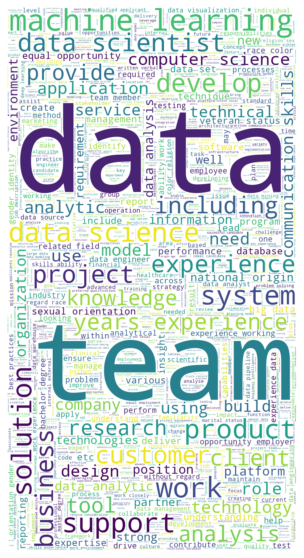

In [79]:
words = " ".join(df_gd['Job Description'])

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()